# VPN detection using NetTiSA flows

In [1]:
import pandas as pd
import numpy as np
import json
import collections

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import seaborn as sns

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
import lightgbm as lgb
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss


In [3]:
df = pd.read_csv("../final_datasets/vpn_vnat_binary.csv")

In [4]:
df

,Unnamed: 0,SRC_IP,DST_IP,SRC_PORT,DST_PORT,TIME_FIRST,TIME_LAST,LABEL,PACKETS,PACKETS_REV,...,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_RELATIVE_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS
0,0,10.123.1.2,10.123.1.1,1195,1195,1.563293e+09,1.563293e+09,True,20340,49299,...,1205.525024,1.448732,0.342489,101.523006,296.427280,0.004257,-9.536743e-07,28.475746,0.739338,0.292078
1,1,10.123.1.2,10.123.1.1,1195,1195,1.563293e+09,1.563293e+09,True,15616,35671,...,1200.527766,1.408053,0.437683,131.171766,299.695530,0.005844,-9.536743e-07,10.289603,0.738252,0.304483
2,2,10.123.1.2,10.123.1.1,1195,1195,1.563293e+09,1.563293e+09,True,14389,34094,...,1214.128380,1.484499,0.552158,161.081312,291.730501,0.006017,-9.536743e-07,10.383657,0.736232,0.296784
3,3,10.123.1.2,10.123.1.1,1195,1195,1.563293e+09,1.563294e+09,True,16712,39599,...,1240.344396,1.650572,0.556384,163.392884,293.669508,0.005215,-1.192093e-06,10.865248,0.769135,0.296780
4,4,10.123.1.2,10.123.1.1,1195,1195,1.563294e+09,1.563294e+09,True,16558,37833,...,1214.184918,1.478362,0.435664,128.586145,295.150082,0.005427,-3.099442e-06,11.857728,0.694760,0.304425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,43395,10.122.1.2,10.124.1.2,43629,53,1.563289e+09,1.563289e+09,False,1,1,...,119.000000,0.000000,0.500000,0.000107,0.000214,0.000214,2.138615e-04,0.000214,0.000000,0.500000
43396,43396,10.122.1.2,10.124.1.2,18920,53,1.563289e+09,1.563289e+09,False,1,1,...,127.251719,0.250000,0.500000,0.000390,0.000780,0.000780,7.801056e-04,0.000780,2.000000,0.500000
43397,43397,10.122.1.2,10.124.1.2,20509,53,1.563289e+09,1.563289e+09,False,1,1,...,127.251719,0.250000,0.500000,0.000211,0.000421,0.000421,4.210472e-04,0.000421,2.000000,0.500000
43398,43398,10.122.1.2,10.124.1.2,5279,53,1.563289e+09,1.563289e+09,False,1,1,...,127.251719,0.250000,0.500000,0.000192,0.000384,0.000384,3.838539e-04,0.000384,2.000000,0.500000


In [4]:
default_faetures = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
]

features = [
    "PACKETS",
    "PACKETS_REV",
    "BYTES",
    "BYTES_REV",
    "MEAN",
    "STDEV",
    "VAR",
    "BURSTINESS",
    "MIN",
    "MAX",
    "MIN_MINUS_MAX",
    "COEFFICIENT_OF_VARIATION",
    "AVERAGE_DISPERSION",
    "PERCENT_DEVIATION",
    "ROOT_MEAN_SQUARE",
    "KURTOSIS",
    "TIME_DISTRIBUTION",
    "MEAN_RELATIVE_TIME",
    "DURATION",
    "MEAN_DIFFTIMES",
    "MIN_DIFFTIMES",
    "MAX_DIFFTIMES",
    "SWITCHING_METRIC",
    "DIRECTIONS",
]

In [5]:
import sklearn
pd.set_option('display.max_columns', None)

df = df[["LABEL"] + features].copy()

df['LABEL'] = df.LABEL.astype('category')
df["LABEL_code"] = df["LABEL"].cat.codes


for F in features:
    df.replace([np.inf], 0, inplace=True)
    df.replace([-np.inf], 0, inplace=True)
    df.loc[df[F].isnull(), F] = 0

In [6]:
df

,LABEL,PACKETS,PACKETS_REV,BYTES,BYTES_REV,MEAN,STDEV,VAR,BURSTINESS,MIN,MAX,MIN_MINUS_MAX,COEFFICIENT_OF_VARIATION,AVERAGE_DISPERSION,PERCENT_DEVIATION,ROOT_MEAN_SQUARE,KURTOSIS,TIME_DISTRIBUTION,MEAN_SCALED_TIME,DURATION,MEAN_DIFFTIMES,MIN_DIFFTIMES,MAX_DIFFTIMES,SWITCHING_METRIC,DIRECTIONS,LABEL_code
0,True,20340,49299,2733120,65450128,1039,611.207821,373576,-0.259235,140,1500,1360,58.826547,578,55.630414,1205.525024,1.448732,0.342489,101.523006,296.427280,0.004257,-9.536743e-07,28.475746,0.739338,0.292078,1
1,True,15616,35671,1995168,47781200,1030,615.832770,379250,-0.251646,140,1500,1360,59.789589,585,56.796117,1200.527766,1.408053,0.437683,131.171766,299.695530,0.005844,-9.536743e-07,10.289603,0.738252,0.304483,1
2,True,14389,34094,1806592,46132816,1048,611.685377,374159,-0.262890,140,1500,1360,58.366925,576,54.961832,1214.128380,1.484499,0.552158,161.081312,291.730501,0.006017,-9.536743e-07,10.383657,0.736232,0.296784,1
3,True,16712,39599,2089552,55411600,1081,607.953123,369607,-0.280083,140,1500,1360,56.239882,563,52.081406,1240.344396,1.650572,0.556384,163.392884,293.669508,0.005215,-1.192093e-06,10.865248,0.769135,0.296780,1
4,True,16558,37833,2033712,51659328,1047,614.565700,377691,-0.260257,140,1500,1360,58.697775,579,55.300860,1214.184918,1.478362,0.435664,128.586145,295.150082,0.005427,-3.099442e-06,11.857728,0.694760,0.304425,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,False,1,1,59,59,119,0.000000,0,-1.000000,119,119,0,0.000000,0,0.000000,119.000000,0.000000,0.500000,0.000107,0.000214,0.000214,2.138615e-04,0.000214,0.000000,0.500000,0
43396,False,1,1,59,75,127,11.313708,128,-0.836405,119,135,16,8.908432,8,6.299213,127.251719,0.250000,0.500000,0.000390,0.000780,0.000780,7.801056e-04,0.000780,2.000000,0.500000,0
43397,False,1,1,59,75,127,11.313708,128,-0.836405,119,135,16,8.908432,8,6.299213,127.251719,0.250000,0.500000,0.000211,0.000421,0.000421,4.210472e-04,0.000421,2.000000,0.500000,0
43398,False,1,1,59,75,127,11.313708,128,-0.836405,119,135,16,8.908432,8,6.299213,127.251719,0.250000,0.500000,0.000192,0.000384,0.000384,3.838539e-04,0.000384,2.000000,0.500000,0


In [7]:
print(f"vpn: {len(df[df['LABEL'] == True])}\tclear: {len(df[df['LABEL'] == False])}")

vpn: 1473	clear: 41927


In [8]:
df = df[["LABEL_code"] + features].copy()

In [9]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

df = clean_dataset(df)

In [10]:
df.shape

(43400, 25)

In [11]:
print(f"vpn: {len(df[df['LABEL_code'] == 1])}\tclear: {len(df[df['LABEL_code'] == 0])}")

vpn: 1473	clear: 41927


In [12]:
df_validation = df.sample(n = 10000)
df_features =  df[~df.isin(df_validation)].dropna()

In [13]:
def get_confusion_matrix(y_test, y_pred):
    # Get and reshape confusion matrix data
    matrix = confusion_matrix(y_test, y_pred)
    percentage_matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    return matrix, percentage_matrix

def plot_confusion_matrix(matrix, percentage_matrix, model=""):
    # Build the plot
    fig, ax = plt.subplots(1, 2,figsize=(15,5))
    sns.set(font_scale=1.4)
    sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[0])
    sns.heatmap(percentage_matrix, annot=True, annot_kws={'size':10}, fmt='g',
                cmap=plt.cm.Greens, linewidths=0.2, ax=ax[1])
    # Add labels to the plot
    plt.tick_params(axis='both', which='minor', labelsize=5)
    # tick_marks = np.arange(len(classifications_array)) + 0.5
    # plt.xticks(tick_marks, classifications_array, rotation=85)
    # plt.yticks(tick_marks, classifications_array, rotation=0)
    ax[0].set_xlabel('Predicted label')
    ax[0].set_ylabel('True label')
    ax[0].set_title(f'Absolute Confusion Matrix for {model}')
    ax[1].set_xlabel('Predicted label')
    ax[1].set_ylabel('True label')
    ax[1].set_title(f'Relative Confusion Matrix for {model}')
    # pyplot.savefig("ddos_timeseries_plugin_classification.eps", format="eps")
    plt.show()

In [16]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import mean_absolute_error

def tunne_together_XGBoost_classification(df_tunne, _features, verbose=True):
    X=df_tunne[_features]  # Features
    y=df_tunne['LABEL_code']  # Labels
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)
    
    def objective(space):
        clf = XGBClassifier(
                        n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), 
                        gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']), 
                        # subsample=int(space['subsample']),
                        # eta=space['eta'],
                            )

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric=["auc","error","logloss"],
                early_stopping_rounds=10,verbose=False)

        pred = clf.predict(X_test)
        # accuracy = mean_absolute_error(y_test, pred)
        # accuracy = accuracy_score(y_test, pred)
        accuracy = f1_score(y_test, pred)
        if verbose is True:
            print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    space={'max_depth': hp.quniform("max_depth", 5, 50, 5),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0, 1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 20, 1),
        'n_estimators': hp.quniform('n_estimators', 50, 400, 50),
        # 'subsample': hp.quniform('subsample', 3, 20, 1),
        # 'eta': hp.quniform('eta', 0.005, 0.3, 0.005),
        'seed': 0
    }
    
    trials = Trials()
    
    best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)
        
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

In [17]:
best_hyperparams = tunne_together_XGBoost_classification(df_features, features, verbose=False)

100%|██████████| 100/100 [03:34<00:00,  2.15s/trial, best loss: -0.98989898989899] 
The best hyperparameters are :  

{'colsample_bytree': 0.5044376240299033, 'gamma': 1.4508338964821301, 'max_depth': 10.0, 'min_child_weight': 1.0, 'n_estimators': 400.0, 'reg_alpha': 0.0, 'reg_lambda': 0.6617054149691088}


In [18]:
def XGBoost_classification_tunned(best_hyperparams):
      X=df_features[features]  # Features
      y=df_features['LABEL_code']  # Labels
      #Split on train and test
      X_train_a, X_test_a, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
      X_train = X_train_a[features]
      X_test = X_test_a[features] 
      model = XGBClassifier(
            n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
            gamma = best_hyperparams['gamma'],
            reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
            colsample_bytree=int(best_hyperparams['colsample_bytree']),
            # subsample=int(best_hyperparams['subsample']),
            # eta=best_hyperparams['eta'],
      )
      eval_set=[(X_train, y_train), (X_test, y_test)]
      model.fit(X_train, y_train, eval_metric=["auc","error","logloss"], eval_set=eval_set, verbose=False)
      y_pred = model.predict(X_test)
      
      accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
      precision = precision_score(y_test, y_pred)  * 100
      recall = recall_score(y_test, y_pred)  * 100
      F1 = f1_score(y_test, y_pred)  * 100
      print("{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1))
      matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
      plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")
      return model

99.94 & 99.42 & 98.85 & 99.14 \\


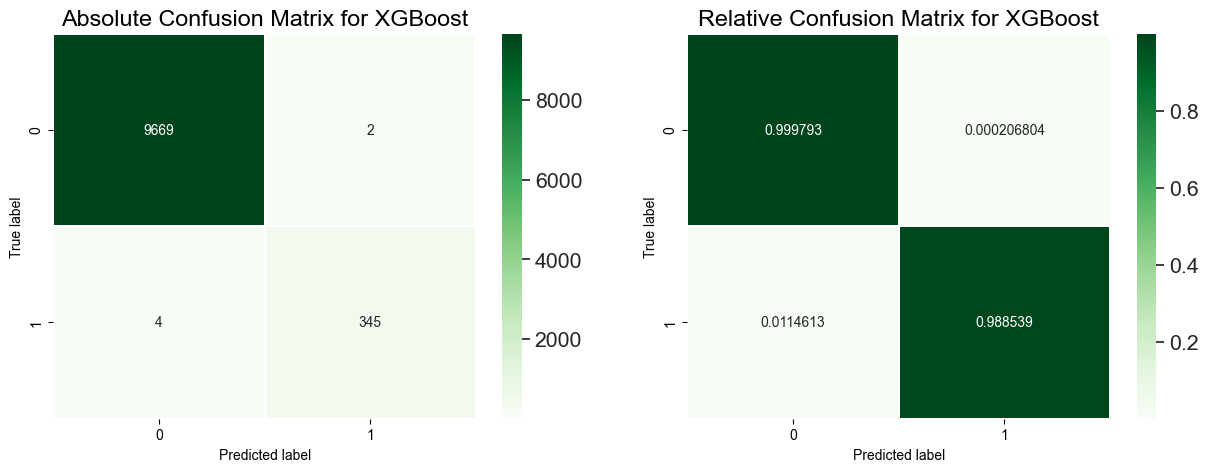

In [19]:
model = XGBoost_classification_tunned(best_hyperparams)

In [25]:
def while_XGBoost_classification_tunned(best_hyperparams, cycles=100):
    X=df_features[features]  # Features
    y=df_features['LABEL_code']  # Labels
    best_results = (0,"",None,None, None)
    for i in range(cycles):
        #Split on train and test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y) # 70% training and 30% test
        model = XGBClassifier(
                n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
                gamma = best_hyperparams['gamma'],
                reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
                colsample_bytree=int(best_hyperparams['colsample_bytree']),
                # subsample=int(best_hyperparams['subsample']),
                # eta=best_hyperparams['eta'],
        )
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_pred)  * 100
        precision = precision_score(y_test, y_pred)  * 100
        recall = recall_score(y_test, y_pred)  * 100
        F1 = f1_score(y_test, y_pred)  * 100
        if best_results[0] < F1:
            matrix, percentage_matrix = get_confusion_matrix(y_test, y_pred)
            best_results = (F1, "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1), matrix, percentage_matrix, model)
    print("")
    print("")
    print("")
    print(best_results[0])
    print(best_results[1])
    plot_confusion_matrix(best_results[2], best_results[3], model="XGBoost")
    return best_results[4]




100.0
100.00 & 100.00 & 100.00 & 100.00 \\


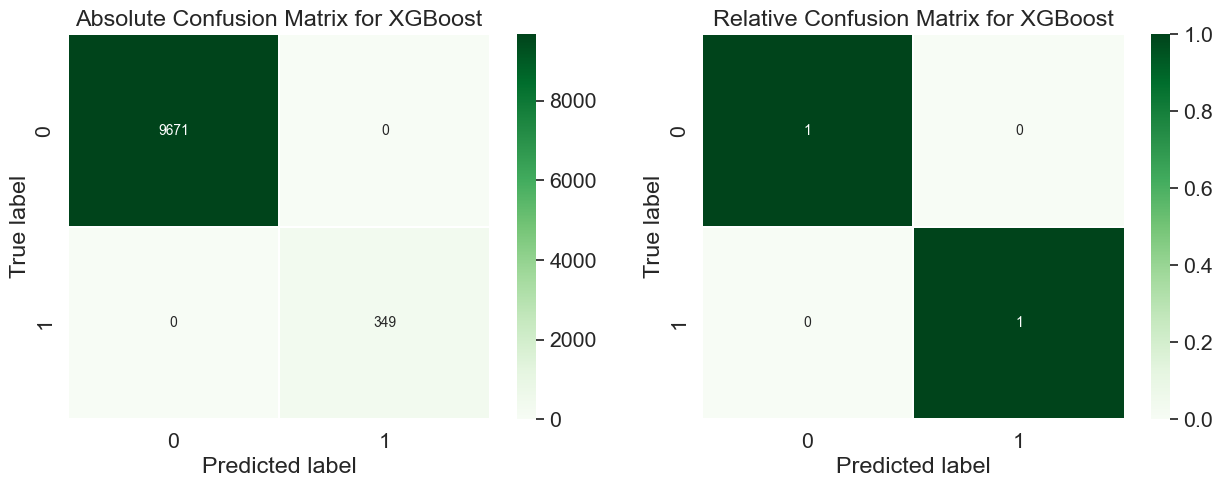

In [50]:
best_model = while_XGBoost_classification_tunned(best_hyperparams, cycles=10)

\multirow{-6}{*}{\rotatebox{90}{\centering \textbf{Our approach}}} & \cellcolor{Gray} \textbf{All} & \rowcolor{LigthGray}99.96 & 100.00 & 98.71 & 99.35 \\
\hline



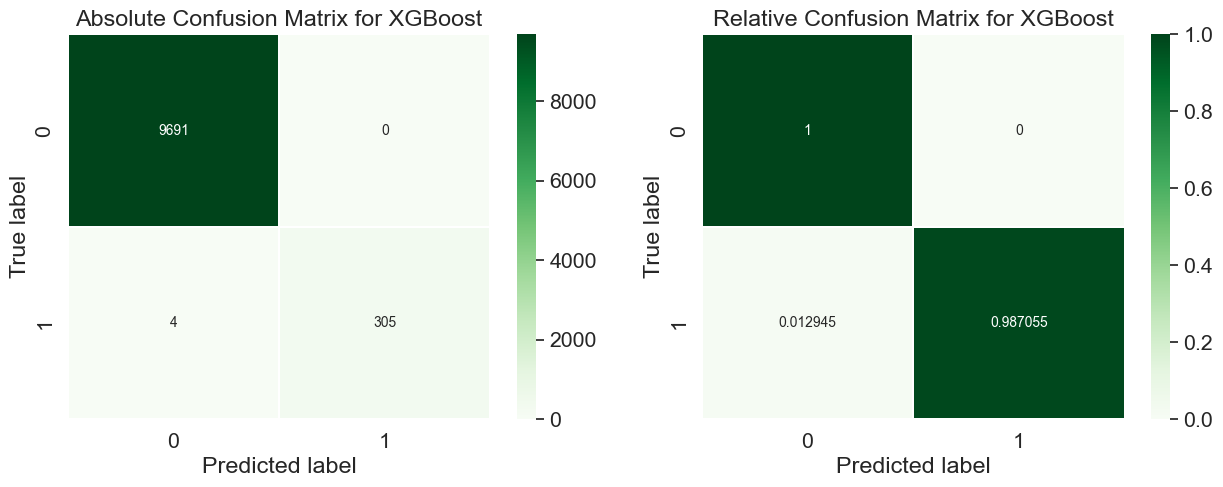

In [51]:
X_validation=df_validation[features]  # Features
y_validation=df_validation['LABEL_code']  # Labels
    

y_pred = best_model.predict(X_validation)
accuracy = metrics.accuracy_score(y_validation, y_pred)  * 100
precision = precision_score(y_validation, y_pred)  * 100
recall = recall_score(y_validation, y_pred)  * 100
F1 = f1_score(y_validation, y_pred)  * 100
                
tmp_str = ""
tmp_str += "\multirow{-6}{*}{\\rotatebox{90}{\centering \\textbf{Our approach}}} & \cellcolor{Gray} \\textbf{All} & \\rowcolor{LigthGray}" 
tmp_str += "{:.2f} & {:.2f} & {:.2f} & {:.2f} \\\\".format(accuracy,precision,recall,F1)
tmp_str += "\n"
tmp_str += "\hline"
tmp_str += "\n"
print(tmp_str)

matrix, percentage_matrix = get_confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(matrix, percentage_matrix, model="XGBoost")

# Feature importance

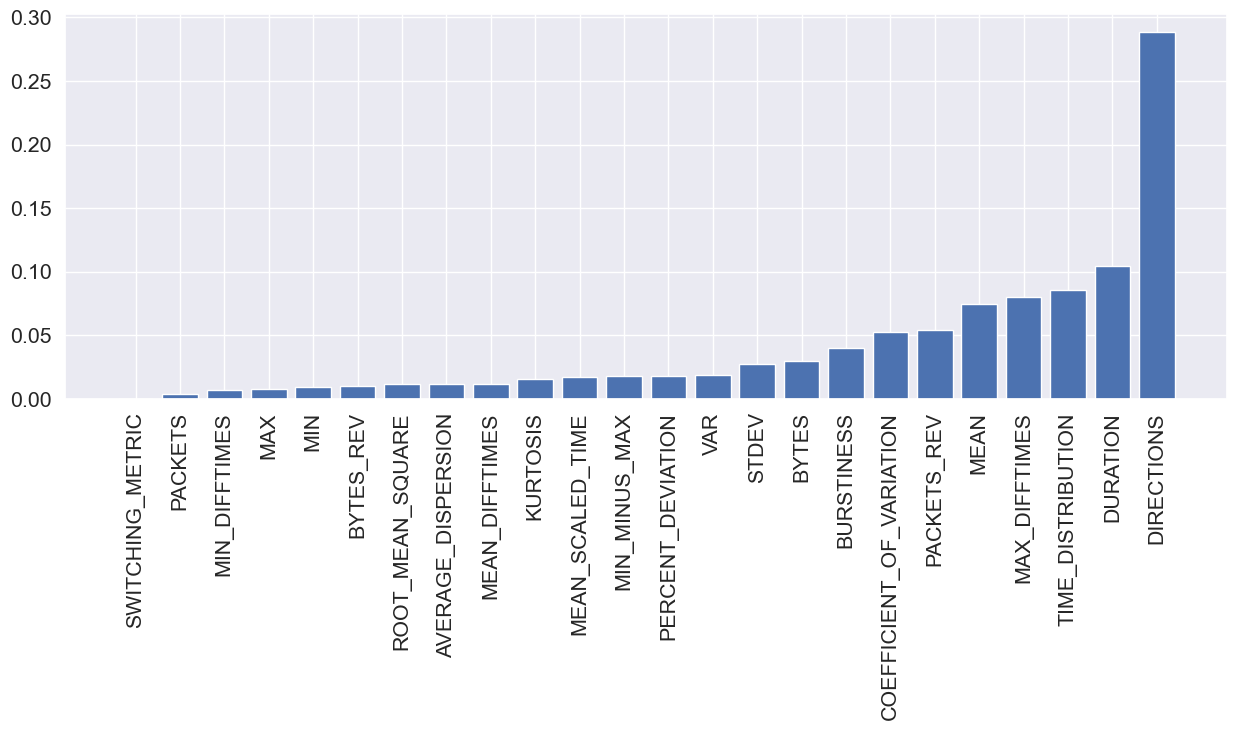

In [52]:
feat_importances = pd.Series(best_model.feature_importances_, index = X_validation.columns).sort_values(ascending = True)
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(feat_importances.keys(), feat_importances.values)
plt.xticks(rotation = 90)
plt.show()

In [53]:
feat_importances.to_dict()

{'SWITCHING_METRIC': 0.0,
 'PACKETS': 0.004033845383673906,
 'MIN_DIFFTIMES': 0.0074797989800572395,
 'MAX': 0.00793925579637289,
 'MIN': 0.009607804007828236,
 'BYTES_REV': 0.010391775518655777,
 'ROOT_MEAN_SQUARE': 0.01174583937972784,
 'AVERAGE_DISPERSION': 0.011894911527633667,
 'MEAN_DIFFTIMES': 0.012098223902285099,
 'KURTOSIS': 0.015539008192718029,
 'MEAN_SCALED_TIME': 0.017296161502599716,
 'MIN_MINUS_MAX': 0.018089456483721733,
 'PERCENT_DEVIATION': 0.018419507890939713,
 'VAR': 0.018797170370817184,
 'STDEV': 0.02725401520729065,
 'BYTES': 0.029732048511505127,
 'BURSTINESS': 0.04011152684688568,
 'COEFFICIENT_OF_VARIATION': 0.05263529717922211,
 'PACKETS_REV': 0.05401776358485222,
 'MEAN': 0.0744112953543663,
 'MAX_DIFFTIMES': 0.08018571138381958,
 'TIME_DISTRIBUTION': 0.08577267080545425,
 'DURATION': 0.10428913682699203,
 'DIRECTIONS': 0.2882578372955322}